## 1. Introduction

The dataset is from AstroDave and Will Cukierski, posted on Kaggle -- 'Digit Recognizer'. The dataset contains the pixel matrix of images of hand writte digits. Our goal is to create models that can accurately classify the hand written digit images. 

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

## 2. Data load / Libraries load

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 

In [2]:
# read data
df_train = pd.read_csv('~/Desktop/train.csv')
df_test = pd.read_csv('~/Desktop/test.csv')

## 3. Data Presentation

In [4]:
df_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# descriptive statistics
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
df_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# descriptive statistics
df_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


## 4. EDA of initial Dataset

In [8]:
# check for na values
df_train.isna().sum().sort_values(ascending=False)

label       0
pixel515    0
pixel517    0
pixel518    0
pixel519    0
           ..
pixel263    0
pixel264    0
pixel265    0
pixel266    0
pixel783    0
Length: 785, dtype: int64

In [9]:
# check for na values
df_test.isna().sum().sort_values(ascending=False)

pixel0      0
pixel515    0
pixel517    0
pixel518    0
pixel519    0
           ..
pixel263    0
pixel264    0
pixel265    0
pixel266    0
pixel783    0
Length: 784, dtype: int64

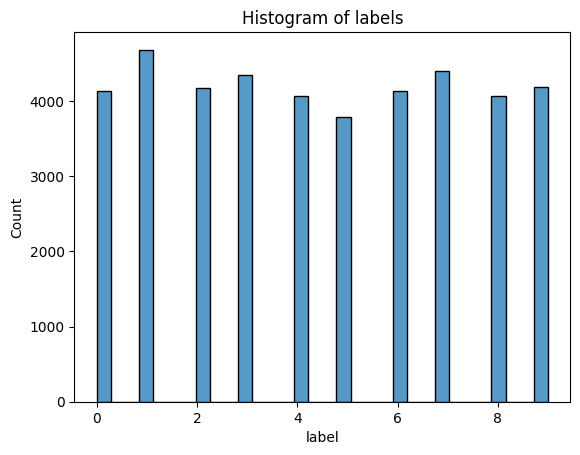

In [10]:
# distribution of target variable
sns.histplot(data=df_train, x='label')
plt.title('Histogram of labels')
plt.show()

In [11]:
# Outliers analysis
def count_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return ((col < lower_bound) | (col > upper_bound)).sum()

outliers = pd.DataFrame(df_train.apply(count_outliers).sort_values(ascending=False), columns= ['outliers'])
outliers.head(10)

,outliers
pixel497,10496
pixel129,10288
pixel357,10207
pixel441,10164
pixel687,10143
pixel623,10137
pixel413,10130
pixel287,10090
pixel204,10040
pixel177,10034


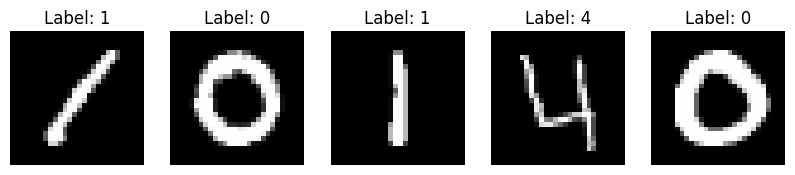

In [12]:
# Sample Visualizations
def plot_sample_images(df, n_samples=5):
    fig, axes = plt.subplots(1, n_samples, figsize=(10, 3))
    for i in range(n_samples):
        img = df.iloc[i, 1:].values.reshape(28, 28)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Label: {df.iloc[i, 0]}")
        axes[i].axis('off')
    plt.show()

plot_sample_images(df_train)

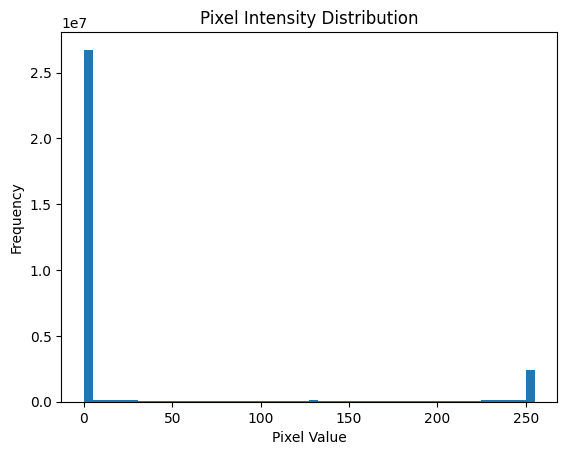

In [13]:
# Check Pixel Intensity Distribution:
plt.hist(df_train.iloc[:, 1:].values.flatten(), bins=50)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## 5. Overview of findings and next steps 

Since this is a unlabeled dataset and our goal is to create unsupervised learning algorithm, we don't need to care about mullticolinearity or correlations. The good thing is that all labels are approximately uniformly distributed, meaning that the dataset is somewhat balanced and it will help the algorithms to classify outcomes more accurately. 

There is no missing values present in the dataset, therefore we don't need to impute any values. 

Since the value span from 0 to 255, it is crucial to standardize the data before performing dimension reduction

## 6. Cleansing and Preprocessing

In [3]:
# Standardization
from sklearn.preprocessing import StandardScaler

sd_scaler = StandardScaler().set_output(transform='pandas')

df_train = sd_scaler.fit_transform(df_train.drop('label', axis=1)).join(df_train[['label']])
df_test = sd_scaler.transform(df_test)

df_train.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,7
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,3
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,5
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,3


In [15]:
# Confirm that the target label is in numerical
df_train['label'].dtype

dtype('int64')

## Model 1: Random Forest Classifier using the full explanatory variables

In [20]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

X = df_train.drop('label', axis=1)
y = df_train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.25)

#grid_param = {
#    'n_estimators':np.arange(20, 120, 5),
#    'criterion':['gini','entropy','log_loss'],
#    'max_depth':[None] + list(np.arange(20, 200, 5)),
#    'min_samples_split':np.arange(2, 10, 5),
#    'min_samples_leaf':np.arange(1, 10, 4),
#    'max_features':['sqrt','log2', None],
#}

print("Starting RandomizedSearchCV...")
start_time = time.time()

#random_search = RandomizedSearchCV(
#    estimator=RandomForestClassifier(random_state=33),
#    param_distributions=grid_param,
#    n_iter=200,  
#    cv=5,  
#    scoring='accuracy',
#    verbose=3,  
#    n_jobs=-1  
#)

rf_model = RandomForestClassifier(random_state=33)
rf_model = rf_model.fit(X_train, y_train)
#random_search.fit(X_train, y_train)

end_time = time.time()

# print(f'Best Random Forest parameters: {random_search.best_params_}')
# 
# rf_model = random_search.best_estimator_
y_pred = rf_model.predict(X_test)

print(f'F1 score for Random Forest is {f1_score(y_test, y_pred, average = "macro")}')
print(f'Accuracy score score for Random Forest is {accuracy_score(y_test, y_pred)}')
print(f"Total Time Taken: {(end_time - start_time)/60:.2f} minutes")

Starting RandomizedSearchCV...
F1 score for Random Forest is 0.9656349246569995
Accuracy score score for Random Forest is 0.9660952380952381
Total Time Taken: 0.35 minutes


## 7. Feature Engineering

In [5]:
# PCA
from sklearn.decomposition import PCA 

pca = PCA(n_components=10).set_output(transform='pandas')

df_train_pca = pca.fit_transform(df_train.drop('label', axis=1)).join(df_train[['label']])
df_test_pca = pca.transform(df_test)

df_train_pca

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,label
0,-5.140476,-5.226460,3.886910,-0.901730,4.930608,2.038010,4.715522,-4.760001,0.227597,-1.560410,1
1,19.292332,6.033076,1.308155,-2.383562,3.095289,-1.784634,-3.779005,0.145781,-4.090011,-4.599045,0
2,-7.644500,-1.705836,2.289336,2.240869,5.093112,-4.152246,-1.012201,1.745064,0.422247,-0.054232,1
3,-0.474207,5.836171,2.008645,4.271439,2.378373,2.178589,4.398833,-0.365516,1.021694,5.434182,4
4,26.559570,6.024868,0.933156,-3.012603,9.490821,-2.328470,-6.156804,-1.800043,-4.100907,-5.861997,0
...,...,...,...,...,...,...,...,...,...,...,...
41995,13.678855,-1.350493,-3.957223,-5.379437,10.870848,-5.118885,0.076605,-5.051557,-4.343785,-0.220896,0
41996,-8.869579,-1.187361,2.323167,1.528446,5.797533,-2.819412,-0.352534,0.542336,0.981641,-1.155397,1
41997,0.495385,7.076402,-12.089642,-3.222744,0.621743,0.332983,-2.133643,10.496369,-2.187127,-2.094649,7
41998,2.307238,-4.344519,0.699859,10.011425,-5.585326,-5.497138,0.185650,5.439278,2.184937,-1.779622,6


## Model 2: Random Forest on PCA

In [7]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

X = df_train_pca.drop('label', axis=1)
y = df_train_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.25)

#grid_param = {
#    'n_estimators':np.arange(20, 120, 5),
#    'criterion':['gini','entropy','log_loss'],
#    'max_depth':[None] + list(np.arange(20, 200, 5)),
#    'min_samples_split':np.arange(2, 10, 5),
#    'min_samples_leaf':np.arange(1, 10, 4),
#    'max_features':['sqrt','log2', None],
#}

print("Starting RandomizedSearchCV...")
start_time = time.time()

#random_search = RandomizedSearchCV(
#    estimator=RandomForestClassifier(random_state=33),
#    param_distributions=grid_param,
#    n_iter=200,  
#    cv=5,  
#    scoring='accuracy',
#    verbose=3,  
#    n_jobs=-1  
#)

rf_pca_model = RandomForestClassifier(random_state=33)
rf_pca_model = rf_pca_model.fit(X_train, y_train)
#random_search.fit(X_train, y_train)

end_time = time.time()

# print(f'Best Random Forest parameters: {random_search.best_params_}')
# 
# rf_model = random_search.best_estimator_
y_pred = rf_pca_model.predict(X_test)

print(f'F1 score for PCA Random Forest is {f1_score(y_test, y_pred, average = "macro")}')
print(f'Accuracy score score for PCA Random Forest is {accuracy_score(y_test, y_pred)}')
print(f"Total Time Taken: {(end_time - start_time)/60:.2f} minutes")

Starting RandomizedSearchCV...
F1 score for PCA Random Forest is 0.89638930471232
Accuracy score score for PCA Random Forest is 0.8985714285714286
Total Time Taken: 0.24 minutes


## 8. Overview presentation of the cleaned dataset

## 9.Final EDA and comparisons

## 10. Data preprocessing specific to the model

## 11. Splitting

## 12. Overview of the steps to be completed and the rationale

## 13. Model training cross-validation. ( comments explanation of parameters)

## 14. Model Hypertuning ( comments explanation of parameters)

## 15. Model testing

## 16. Model evaluation with complete graphical and tabular presentations for all metrics, matrices and curves

## 17. Conclusion

## 18. Answers to assignment questions

## 19. References


AstroDave and Will Cukierski. Digit Recognizer. Kaggle. 2012. 
https://kaggle.com/competitions/digit-recognizer
